In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.utils import np_utils

# fix a random seed for reproducibility
np.random.seed(9)

Using TensorFlow backend.


In [11]:
nb_epoch = 10
num_classes = 10
batch_size = 128
train_size = 60000
test_size = 10000
v_length = 784

In [3]:
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()
print("train data shape: {}".format(trainData.shape))
print("test data shape: {}".format(testData.shape))
print("train samples: {}".format(trainData.shape[0]))
print("test samples: {}".format(testData.shape[0]))

11493376/11490434 [==============================] - 55s 5us/step
train data shape: (60000, 28, 28)
test data shape: (10000, 28, 28)
train samples: 60000
test samples: 10000


In [4]:
trainData = trainData.reshape(train_size, v_length)
testData = testData.reshape(test_size, v_length)
trainData = trainData.astype("float32")
testData = testData.astype("float32")
trainData /= 255
testData /= 255

print("train data shape: {}".format(trainData.shape))
print("test data shape: {}".format(testData.shape))
print("train samples: {}".format(trainData.shape[0]))
print("test samples: {}".format(testData.shape[0]))

train data shape: (60000, 784)
test data shape: (10000, 784)
train samples: 60000
test samples: 10000


In [5]:
mTrainLabels = np_utils.to_categorical(trainLabels, num_classes)
mTestLabels = np_utils.to_categorical(testLabels, num_classes)

In [6]:
model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(num_classes,activation="softmax"))

# summarize the model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dens

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [8]:
trainData=trainData.reshape(-1,28,28,1)
testData=testData.reshape(-1,28,28,1)
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, nb_epoch=nb_epoch, verbose=2)


Instructions for updating:
Use tf.cast instead.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 21s - loss: 0.2866 - acc: 0.9125 - val_loss: 0.0711 - val_acc: 0.9786
Epoch 2/100
 - 20s - loss: 0.0682 - acc: 0.9788 - val_loss: 0.0410 - val_acc: 0.9867
Epoch 3/100
 - 22s - loss: 0.0461 - acc: 0.9855 - val_loss: 0.0419 - val_acc: 0.9860
Epoch 4/100
 - 21s - loss: 0.0373 - acc: 0.9883 - val_loss: 0.0349 - val_acc: 0.9883
Epoch 5/100
 - 22s - loss: 0.0296 - acc: 0.9908 - val_loss: 0.0387 - val_acc: 0.9880
Epoch 6/100
 - 25s - loss: 0.0253 - acc: 0.9920 - val_loss: 0.0367 - val_acc: 0.9891
Epoch 7/100
 - 21s - loss: 0.0217 - acc: 0.9931 - val_loss: 0.0275 - val_acc: 0.9911
Epoch 8/100
 - 21s - loss: 0.0182 - acc: 0.9942 - val_loss: 0.0311 - val_acc: 0.9906
Epoch 9/100
 - 21s - loss: 0.0168 - acc: 0.9943 - val_loss: 0.0324 - val_acc: 0.9901
Epoch 10/100
 - 21s - loss: 0.0143 - acc: 0.9955 - val_loss: 0.0335 - val_acc: 0.9902
Epoch 11/100
 - 22s - loss: 0.0124 - acc: 0.9959 - val_loss: 0.0368 - val_acc: 0.9876
Epoch 12/100


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


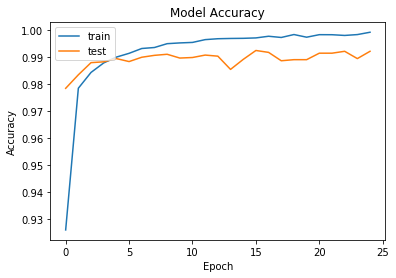

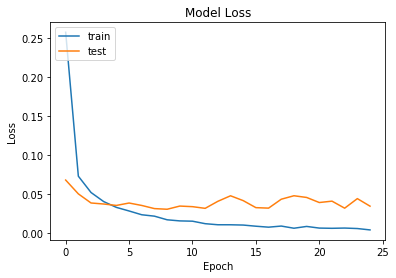

test score - 0.034034924408139614
test accuracy - 0.992


In [48]:
print(history.history.keys())

# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# print the results
print("test score - {}".format(scores[0]))
print("test accuracy - {}".format(scores[1]))

test images shape - (1, 28, 28)
the digit is  - 7


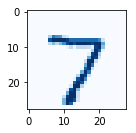

In [58]:
import matplotlib.pyplot as plt
test_images = testData[0:1]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print("test images shape - {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
	org_image = test_image
	test_image = test_image.reshape(-1,28,28,1)
	prediction = model.predict_classes(test_image, verbose=0)
	print("the digit is  - {}".format(prediction[0]))
	plt.subplot(220+i)
	plt.imshow(org_image, cmap=plt.get_cmap('Blues'))

plt.show()